<a href="https://colab.research.google.com/github/Pushkar0655g/STML/blob/main/_stml_project_bmw_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bmw.csv')

# Select features and target variable
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 46264837.98100206
Coefficients: [ 2.02780506e+03 -1.28122103e-01  3.71788224e+00  2.16644225e+01
  1.01278373e+04]
Intercept: -4087880.544287102


KNN

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bmw.csv')

# Data Preprocessing
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Check for correct column names
print(data.columns)  # Print the available columns to verify

# Convert categorical variables into numerical
# Replace 'Transmission', 'Fuel Type', 'Model' with the actual column names from your dataset
# Assuming the actual column names are 'transmission', 'fuelType', 'model'
data['transmission'] = data['transmission'].astype('category').cat.codes
data['fuelType'] = data['fuelType'].astype('category').cat.codes
data['model'] = data['model'].astype('category').cat.codes

# Split features and target variable
# Replace 'Price' with the actual target column name from your dataset
# Assuming the actual target column name is 'price'
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # Using k=5
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Example Prediction
example_data = X_test[:5]  # Take 5 examples from the test set
example_predictions = knn.predict(example_data)
print("Example Predictions:", example_predictions)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Mean Squared Error (MSE): 9388391.668006182
Mean Absolute Error (MAE): 1810.1391035548686
R² Score: 0.9271427964970483
Example Predictions: [13585.4 14372.4 41246.2 21694.  14966.8]


<ipython-input-4-37d8d4ae1b9a>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


DECISION TREE

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import random
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features

# Load the dataset (update the path as needed)
data = pd.read_csv('/content/drive/MyDrive/bmw.csv')

# Randomly select features and a target column
all_columns = data.columns.tolist()
target = random.choice(all_columns)  # Select a random target
features = random.sample([col for col in all_columns if col != target], k=min(3, len(all_columns) - 1))

X = data[features]
y = data[target]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through features and encode if they are of type 'object' (categorical)
for feature in features:
    if X[feature].dtype == 'object':
        X[feature] = encoder.fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Selected Features:", features)
print("Target Variable:", target)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Mounted at /content/drive
Selected Features: ['price', 'mpg', 'engineSize']
Target Variable: model
Accuracy: 0.6152063050533148
Classification Report:
               precision    recall  f1-score   support

    1 Series       0.67      0.68      0.68       374
    2 Series       0.48      0.51      0.50       232
    3 Series       0.65      0.68      0.66       485
    4 Series       0.43      0.40      0.42       207
    5 Series       0.50      0.46      0.48       211
    6 Series       0.46      0.63      0.53        19
    7 Series       0.81      0.65      0.72        26
    8 Series       0.40      0.33      0.36         6
          M2       0.83      0.83      0.83         6
          M3       0.29      0.40      0.33         5
          M4       0.89      0.89      0.89        27
          M5       0.56      0.71      0.62         7
          M6       0.00      0.00      0.00         4
          X1       0.56      0.59      0.58       170
          X2       0.69      0.58    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RANDOM FOREST

In [8]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import random
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bmw.csv')

# Randomly select features and a target column
all_columns = data.columns.tolist()
target = random.choice(all_columns)  # Select a random target
features = random.sample([col for col in all_columns if col != target], k=min(3, len(all_columns) - 1))

X = data[features]
y = data[target]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through features and encode if they are of type 'object' (categorical)
for feature in features:
    if X[feature].dtype == 'object':
        X[feature] = encoder.fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Make predictions
y_pred = forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Selected Features:", features)
print("Target Variable:", target)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-d976a846b617>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = encoder.fit_transform(X[feature])


Selected Features: ['transmission', 'price', 'tax']
Target Variable: fuelType
Accuracy: 0.6606397774687065
Classification Report:
               precision    recall  f1-score   support

      Diesel       0.74      0.75      0.74      1400
    Electric       0.00      0.00      0.00         1
      Hybrid       0.81      0.73      0.77        59
       Other       0.00      0.00      0.00         7
      Petrol       0.49      0.48      0.49       690

    accuracy                           0.66      2157
   macro avg       0.41      0.39      0.40      2157
weighted avg       0.66      0.66      0.66      2157



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SUPPORT VECTOR REGRESSION

In [9]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bmw.csv')

# Select features and target variable
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
X_test = scaler_X.transform(X_test)

# Create and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions
predictions = scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1))

# Display predictions
print(predictions)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[14532.19709216]
 [13857.18403488]
 [44407.89411913]
 ...
 [25488.92970704]
 [42940.88350705]
 [40623.51998956]]


RMSE, MAE
Confidence Intervals and Prediction Intervals
Learning Curves .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RMSE: 4936.805932840208
MAE: 2987.7127989685155
Confidence Interval: ±0.037536924208160787
Prediction Interval: [-0.036091517130373285, 0.03898233128594829]


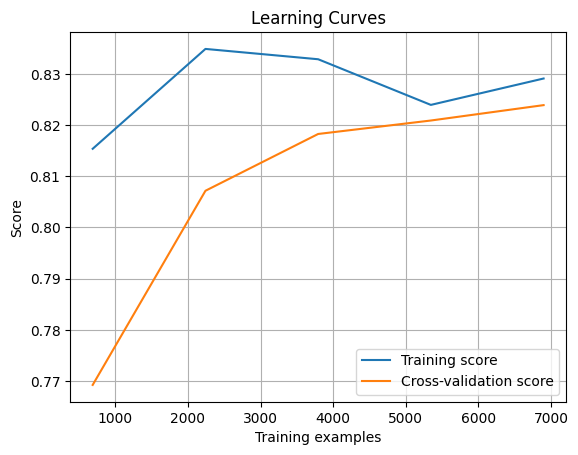

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bmw.csv')

# Select features and target variable
X = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
X_test = scaler_X.transform(X_test)

# Create and train the SVR model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions
y_pred = scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1))

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Confidence Intervals
predictions = model.predict(X_test)
predictions_std = np.std(predictions)
confidence_interval = 1.96 * predictions_std / np.sqrt(len(predictions))

print(f'Confidence Interval: ±{confidence_interval}')

# Prediction Intervals (using a simple method)
predicted_mean = np.mean(predictions)
prediction_interval_lower = predicted_mean - confidence_interval
prediction_interval_upper = predicted_mean + confidence_interval

print(f'Prediction Interval: [{prediction_interval_lower}, {prediction_interval_upper}]')

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()